In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection,preprocessing,linear_model,metrics
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [47]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sub_data = pd.read_csv('gender_submission.csv')

In [48]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train_data.Age.fillna(value = train_data['Age'].mean(),inplace = True)

In [50]:
def clean_data(data):
    data.loc[data['Sex']=='male','Sex'] = 0
    data.loc[data['Sex']=='female','Sex'] = 1
    data.loc[data['Embarked']=='S','Embarked'] = 0
    data.loc[data['Embarked']=='C','Embarked'] = 1
    data.loc[data['Embarked']=='Q','Embarked'] = 2
    

clean_data(train_data)

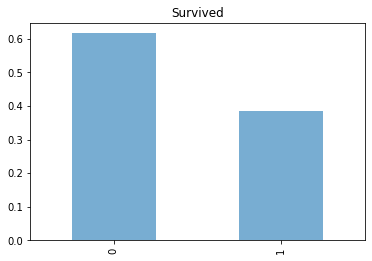

In [51]:
train_data.Survived.value_counts(normalize = True).plot(kind='bar',alpha = 0.6)
plt.title('Survived')

plt.show()

female_color = 'coral'
male_color = 'grey'

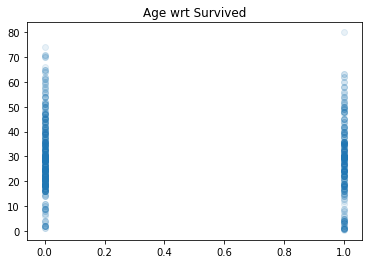

In [52]:
plt.scatter(train_data.Survived,train_data.Age, alpha = 0.1)
plt.title('Age wrt Survived')
plt.show()



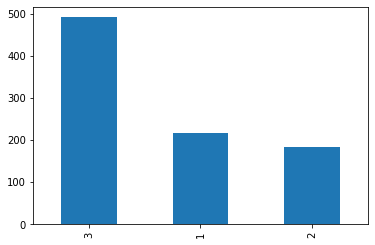

In [53]:
train_data.Pclass.value_counts().plot(kind='bar')

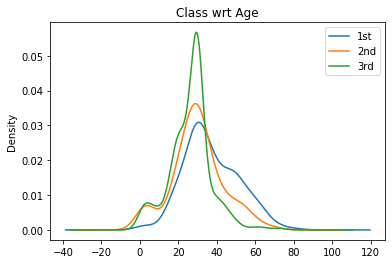

In [54]:
for x in [1,2,3]:
    train_data.Age[train_data.Pclass == x].plot(kind='kde')
plt.title('Class wrt Age')
plt.legend(('1st','2nd','3rd'))
plt.show()

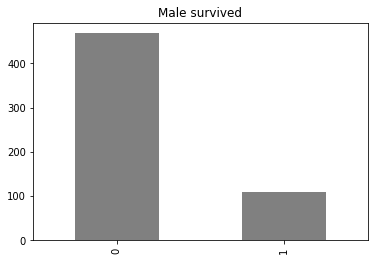

In [56]:
train_data.Survived[train_data.Sex==0].value_counts().plot(kind = 'bar',color = male_color)
plt.title('Male survived')
plt.show()

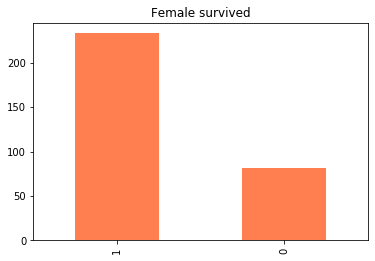

In [57]:
train_data.Survived[train_data.Sex==1].value_counts().plot(kind = 'bar',color = female_color)
plt.title('Female survived')
plt.show()

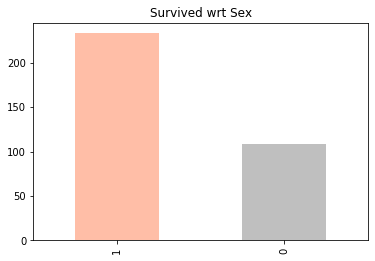

In [58]:
train_data.Sex[train_data.Survived==1].value_counts().plot(kind='bar',color=(female_color,male_color),alpha = 0.5)
plt.title('Survived wrt Sex')
plt.show()

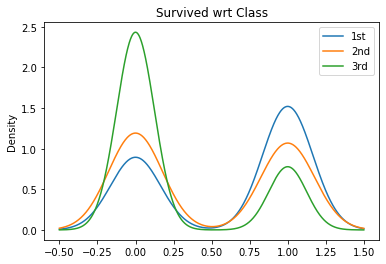

In [59]:
for x in [1,2,3]:
    train_data.Survived[train_data.Pclass==x].plot(kind='kde')
plt.title('Survived wrt Class')
plt.legend(('1st','2nd','3rd'))
plt.show()

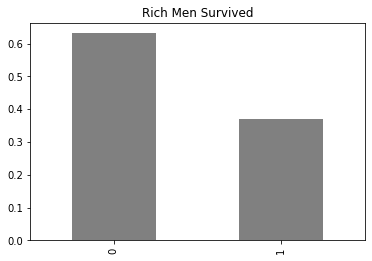

In [61]:
train_data.Survived[(train_data.Pclass == 1) & (train_data.Sex == 0)].value_counts(normalize = True).plot(kind='bar',color = male_color)
plt.title('Rich Men Survived')
plt.show()

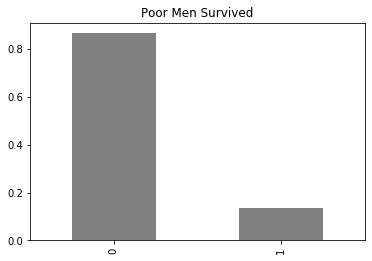

In [62]:
train_data.Survived[(train_data.Pclass == 3) & (train_data.Sex == 0)].value_counts(normalize = True).plot(kind='bar',color = male_color)
plt.title('Poor Men Survived')
plt.show()

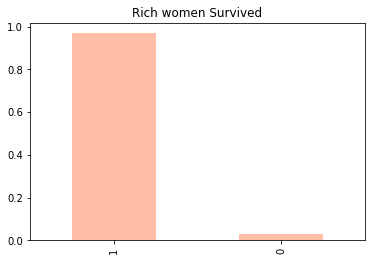

In [63]:
train_data.Survived[(train_data.Pclass == 1) & (train_data.Sex == 1)].value_counts(normalize = True).plot(kind='bar',color= female_color,alpha = 0.5)
plt.title('Rich women Survived')
plt.show()

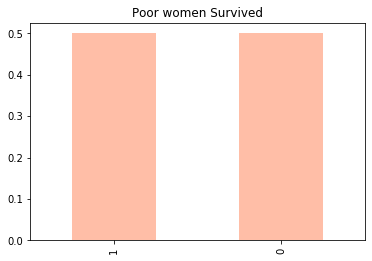

In [64]:
train_data.Survived[(train_data.Pclass == 3) & (train_data.Sex == 1)].value_counts(normalize = True).plot(kind='bar',color = female_color,alpha = 0.5)
plt.title('Poor women Survived')
plt.show()

In [65]:
# Most people embarked at S
train_data['Embarked'].value_counts(normalize = True)

0    0.724409
1    0.188976
2    0.086614
Name: Embarked, dtype: float64

In [66]:
# We can assume the NaN values to be S
train_data.Embarked.fillna(value = 0,inplace=True)

In [67]:
train_data['Age range'] = pd.cut(train_data['Age'],5)
train_data['Age range'].value_counts()

(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age range, dtype: int64

In [68]:
def clean_age(data):
    data.loc[data['Age'] <= 16,'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32),'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48),'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64),'Age'] = 3
    data.loc[(data['Age'] > 64) & (data['Age'] <= 80),'Age'] = 4
clean_age(train_data)

In [69]:
# Shows the survival rate of younger people is higher
train_data[['Age range','Survived']].groupby('Age range').mean()

,Survived
Age range,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [70]:
train_data['Fare range'] = pd.cut(train_data['Fare'],5)

In [71]:
train_data['Fare range'].value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare range, dtype: int64

In [72]:
def clean_Fare(data):
    data.loc[data['Fare'] <= 102,'Fare'] = 0
    data.loc[(data['Fare'] > 102) & (data['Fare'] <= 204),'Fare'] = 1
    data.loc[(data['Fare'] > 204) & (data['Fare'] <= 307),'Fare'] = 2
    data.loc[(data['Fare'] > 307) & (data['Fare'] <= 409),'Fare'] = 3
    data.loc[(data['Fare'] > 409),'Fare'] = 4
clean_Fare(train_data)

In [73]:
train_data[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [74]:
train_data[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [75]:
# Class 1 had higher survival rate than 2 & 3
train_data[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [76]:
# Final check
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age range,Fare range
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,"(16.336, 32.252]","(-0.512, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,0.0,C85,1,"(32.252, 48.168]","(-0.512, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,"(16.336, 32.252]","(-0.512, 102.466]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,0.0,C123,0,"(32.252, 48.168]","(-0.512, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,"(32.252, 48.168]","(-0.512, 102.466]"


# Clean Test data

In [77]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [79]:
test_data['Age'].fillna(value=test_data['Age'].mean(),inplace=True)
test_data['Fare'].fillna(value = 0,inplace=True)

In [80]:
clean_data(test_data)
clean_age(test_data)
clean_Fare(test_data)

# Logistic Regression model

In [81]:
target = 'Survived'

features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [82]:
regr = linear_model.LogisticRegression()
regr_model = regr.fit(train_data[features],train_data[target])
print(regr_model.score(train_data[features],train_data[target]))

0.7968574635241302


In [83]:
regr_pred = regr_model.predict(test_data[features])

In [84]:
print(metrics.mean_absolute_error(sub_data['Survived'],regr_pred))

print(metrics.mean_squared_error(sub_data['Survived'],regr_pred))

print(np.sqrt(metrics.mean_squared_error(sub_data['Survived'],regr_pred)))

0.06937799043062201
0.06937799043062201
0.2633970205424162


# Polynomial features

In [85]:
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(train_data[features])

regr_model = regr.fit(poly_features,train_data[target])
print(regr_model.score(poly_features,train_data[target]))

0.8372615039281706


In [86]:
test_poly_features = poly.fit_transform(test_data[features])
poly_regr_pred = regr_model.predict(test_poly_features)

In [87]:
print(metrics.mean_absolute_error(sub_data['Survived'],poly_regr_pred))

print(metrics.mean_squared_error(sub_data['Survived'],poly_regr_pred))

print(np.sqrt(metrics.mean_squared_error(sub_data['Survived'],poly_regr_pred)))

0.10526315789473684
0.10526315789473684
0.3244428422615251


In [88]:
output_regr = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':regr_pred})

In [89]:
output_regr.to_csv('Titanic Prediction.csv',index=0)